# DSC180B EDA

# Importing Packages

In [1]:
import json
import os
from src.data import make_dataset
from src.features import build_features


In [2]:
## Creating paths to store temp and out data ##
if not os.path.exists("data/temp"):
    os.makedirs("data/temp")
if not os.path.exists("data/out"):
    os.makedirs("data/out")

In [3]:
from qiime2.plugins import feature_table
from qiime2 import Artifact
from qiime2.plugins.sample_classifier.pipelines import classify_samples
from qiime2.plugins.feature_table.methods import filter_samples
from qiime2 import Metadata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import biom
import seaborn as sns
# %matplotlib inline 

## Loading Data

In [4]:
## Obtaining file paths
with open("config/data-params.json") as fh:
    file_paths = json.load(fh)

In [5]:
table = make_dataset.read_feature_table(file_paths["feature_table_path"])
metadata = make_dataset.read_metadata(file_paths["metadata_path"])

/home/rherlim/DSC180-Q2-Project/src/data/make_dataset.py:25: DtypeWarning: Columns (1,2,3,4,6,7,8,10,11,12,13,14,17,18,19,20,25,26,27,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,55,56,57,61,62,63,64,65,66,67,69,70,71,72,73,75,76,78,80,82,83,84,85,86,87,88,89,90,91,92,95,98,99,102,103,104,105,106,107,108,109,111,119,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,138,139,141,142,143,144,145,146,147,148,152,153,155,156,157,160,164,165,168,169,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(path, sep='\t', index_col=0)


In [6]:
biom_table = table.view(biom.Table)
print(biom_table.head())

# Constructed from biom file
#OTU ID	11666.BLANK7.7B	11666.BLANK5.5B	11666.G0341A	11666.BLANK3.3A	11666.BLANK5.5E
AACATAAGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGCCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGTCCGGAAACACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCATAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGAGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0


In [7]:
metadata.head()

,abdominal_obesity_idf_v2,abdominal_obesity_ncep_v2,ac_ratio_gt30,ac_ratio_gt30_v2,age_units,age_v2,agegroup_c6_nhanes_v2,agegroup_c6_v2,anonymized_name,antibiotic,...,taxon_id,title,type_stool,us_born_v2,weight_norm_overall_v2,weight_units,yes_no,yogurt,yrs_btwn_viv2,yrsus_c2_v2
sample_name,,,,,,,,,,,,,,,,,,,,,
11666.BLANK1.1A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1A.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1C,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1C,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable


## Subset of Metadata

In [8]:
# Subset of data
disease_cols = ['abdominal_obesity_ncep_v2', 'ckd_v2', 'diabetes2_v2','hypertension2_v2','precvd_v2','elevated_bp_selfmeds_v2','dyslipidemia_v2']
features = disease_cols + ['gender_v2','agegroup_c6_v2','bmigrp_c6_v2','center','us_born_v2','income_c5_v2']

In [9]:
numeric_col = [
    'abdominal_obesity_ncep_v2','ckd_v2','diabetes2_v2',
    'hypertension2_v2','precvd_v2','elevated_bp_selfmeds_v2',
    'dyslipidemia_v2','agegroup_c6_v2',
    'bmigrp_c6_v2','us_born_v2','income_c5_v2']
categorical_col = ['center','gender_v2']

In [10]:
sub_metadata = metadata[features]
sub_metadata.head()

,abdominal_obesity_ncep_v2,ckd_v2,diabetes2_v2,hypertension2_v2,precvd_v2,elevated_bp_selfmeds_v2,dyslipidemia_v2,gender_v2,agegroup_c6_v2,bmigrp_c6_v2,center,us_born_v2,income_c5_v2
sample_name,,,,,,,,,,,,,
11666.BLANK1.1A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK1.1A.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK1.1B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK1.1B.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK1.1C,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable


## Missing Data Analysis

In [11]:
# Function for single representation of missing values
def missing_values(col, type='categorical'):
    temp = col.apply(lambda x: np.nan if x == 'not applicable' or x == 'not provided' else x)
    if type == 'numeric':
        temp = temp.apply(lambda x: x if pd.isnull(x) else np.float64(x))
    return temp

In [12]:
metadata['ckd_v2'].value_counts()

1                 1746
2                 1189
not applicable     596
3                  167
2.0                 17
4                   14
1.0                  8
5                    7
not provided         7
Name: ckd_v2, dtype: int64

In [13]:
missing_values(metadata['ckd_v2'],'numeric').value_counts()

1.0    1754
2.0    1206
3.0     167
4.0      14
5.0       7
Name: ckd_v2, dtype: int64

## Replacing missing values in metadata subset

In [14]:
sub_metadata.loc[:,numeric_col] = sub_metadata.loc[:,numeric_col].apply(lambda x: missing_values(x,'numeric'))
sub_metadata.loc[:,categorical_col] = sub_metadata.loc[:,categorical_col].apply(lambda x: missing_values(x,'categorical'))

/tmp/ipykernel_764/289276134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_metadata.loc[:,numeric_col] = sub_metadata.loc[:,numeric_col].apply(lambda x: missing_values(x,'numeric'))
/tmp/ipykernel_764/289276134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_metadata.loc[:,categorical_col] = sub_metadata.loc[:,categorical_col].apply(lambda x: missing_values(x,'categorical'))


In [15]:
sub_metadata.head()

,abdominal_obesity_ncep_v2,ckd_v2,diabetes2_v2,hypertension2_v2,precvd_v2,elevated_bp_selfmeds_v2,dyslipidemia_v2,gender_v2,agegroup_c6_v2,bmigrp_c6_v2,center,us_born_v2,income_c5_v2
sample_name,,,,,,,,,,,,,
11666.BLANK1.1A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11666.BLANK1.1A.ITS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11666.BLANK1.1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11666.BLANK1.1B.ITS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11666.BLANK1.1C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping Missing Data

In [16]:
sub_metadata_no_nan = sub_metadata.dropna()
sub_metadata_no_nan.head()

,abdominal_obesity_ncep_v2,ckd_v2,diabetes2_v2,hypertension2_v2,precvd_v2,elevated_bp_selfmeds_v2,dyslipidemia_v2,gender_v2,agegroup_c6_v2,bmigrp_c6_v2,center,us_born_v2,income_c5_v2
sample_name,,,,,,,,,,,,,
11666.G0001A,1.0,1.0,2.0,1.0,0.0,1.0,0.0,F,4.0,4.0,M,0.0,1.0
11666.G0001L,1.0,1.0,2.0,1.0,0.0,1.0,0.0,F,4.0,4.0,M,0.0,1.0
11666.G0003A,1.0,1.0,1.0,0.0,0.0,0.0,0.0,F,4.0,3.0,B,1.0,4.0
11666.G0003L,1.0,1.0,1.0,0.0,0.0,0.0,0.0,F,4.0,3.0,B,1.0,4.0
11666.G0004A,0.0,2.0,2.0,1.0,0.0,1.0,0.0,M,5.0,3.0,B,0.0,4.0


## Converting column dtypes

In [17]:
convert_dict = {x: np.float64 for x in numeric_col}
sub_metadata_no_nan = sub_metadata_no_nan.astype(convert_dict)

## Converting diabetes and ckd into binary variables

In [18]:
diabetes_binary = {1.0:0.0,
                   2.0:0.0,
                   3.0:1.0}
ckd_binary = {1.0:0.0, 
              2.0:1.0,
              3.0:1.0,
              4.0:1.0,
              5.0:1.0}

In [19]:
sub_metadata_no_nan['diabetes2_v2'] = sub_metadata_no_nan['diabetes2_v2'].apply(lambda x: diabetes_binary[x])
sub_metadata_no_nan['ckd_v2'] = sub_metadata_no_nan['ckd_v2'].apply(lambda x:ckd_binary[x])

## Filtering metadata with feature table samples

In [20]:
sub_metadata_no_nan.head()

,abdominal_obesity_ncep_v2,ckd_v2,diabetes2_v2,hypertension2_v2,precvd_v2,elevated_bp_selfmeds_v2,dyslipidemia_v2,gender_v2,agegroup_c6_v2,bmigrp_c6_v2,center,us_born_v2,income_c5_v2
sample_name,,,,,,,,,,,,,
11666.G0001A,1.0,0.0,0.0,1.0,0.0,1.0,0.0,F,4.0,4.0,M,0.0,1.0
11666.G0001L,1.0,0.0,0.0,1.0,0.0,1.0,0.0,F,4.0,4.0,M,0.0,1.0
11666.G0003A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F,4.0,3.0,B,1.0,4.0
11666.G0003L,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F,4.0,3.0,B,1.0,4.0
11666.G0004A,0.0,1.0,0.0,1.0,0.0,1.0,0.0,M,5.0,3.0,B,0.0,4.0


In [21]:
# unsure if i should filter samples in metadata
final_metadata = sub_metadata_no_nan.loc[sub_metadata_no_nan.index.isin(biom_table.ids())]
final_metadata.head()

,abdominal_obesity_ncep_v2,ckd_v2,diabetes2_v2,hypertension2_v2,precvd_v2,elevated_bp_selfmeds_v2,dyslipidemia_v2,gender_v2,agegroup_c6_v2,bmigrp_c6_v2,center,us_born_v2,income_c5_v2
sample_name,,,,,,,,,,,,,
11666.G0001A,1.0,0.0,0.0,1.0,0.0,1.0,0.0,F,4.0,4.0,M,0.0,1.0
11666.G0003A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F,4.0,3.0,B,1.0,4.0
11666.G0004A,0.0,1.0,0.0,1.0,0.0,1.0,0.0,M,5.0,3.0,B,0.0,4.0
11666.G0005A,1.0,0.0,0.0,1.0,0.0,1.0,0.0,F,6.0,3.0,B,0.0,2.0
11666.G0006A,1.0,1.0,1.0,1.0,1.0,1.0,0.0,M,6.0,3.0,B,0.0,2.0


## Saving final metadata

In [22]:
# have to convert to T and F for qiime2 models
def binary_to_tf(val):
    if val == 1.0:
        return 'T'
    elif val == 0.0:
        return 'F'
    else:
        return 'missing'

In [23]:
final_metadata.to_csv("data/temp/final_metadata.tsv",sep="\t")
## Loading Metadata as qiime Metadata object
qiime_metadata = Metadata.load("data/temp/final_metadata.tsv")

## EDA on Subset of Metadata

### Disease Counts

In [24]:
def create_bar_col_binary(df, col_name):
    ax = df[col_name].value_counts().sort_index(ascending=False).plot(kind='barh')
    ax.set_xlabel('count')
    ax.set_ylabel('outcome')
    ax.set_title(col_name)

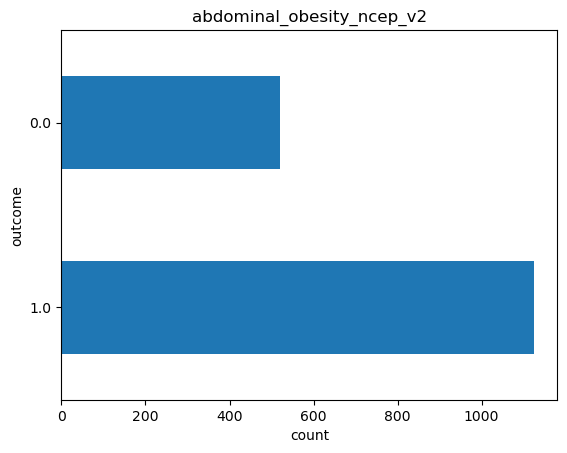

In [25]:
create_bar_col_binary(final_metadata, 'abdominal_obesity_ncep_v2')

### Gender Counts

<AxesSubplot: >

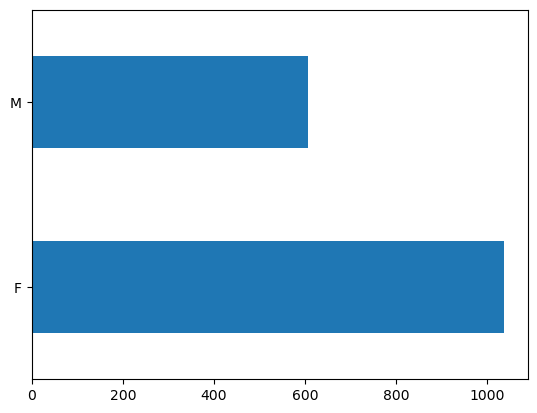

In [26]:
final_metadata['gender_v2'].value_counts().plot(kind='barh')

### Center Counts

<AxesSubplot: >

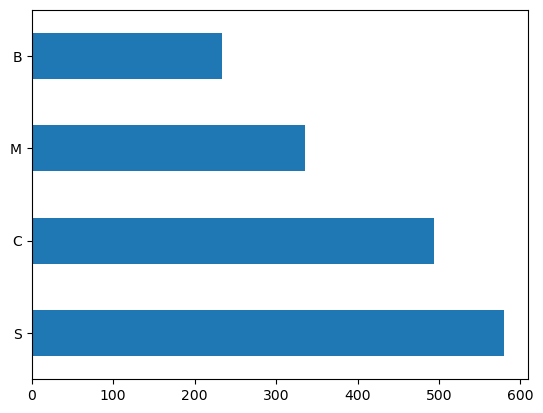

In [27]:
final_metadata['center'].value_counts().plot(kind='barh')

### Count of individual diseases

<AxesSubplot: >

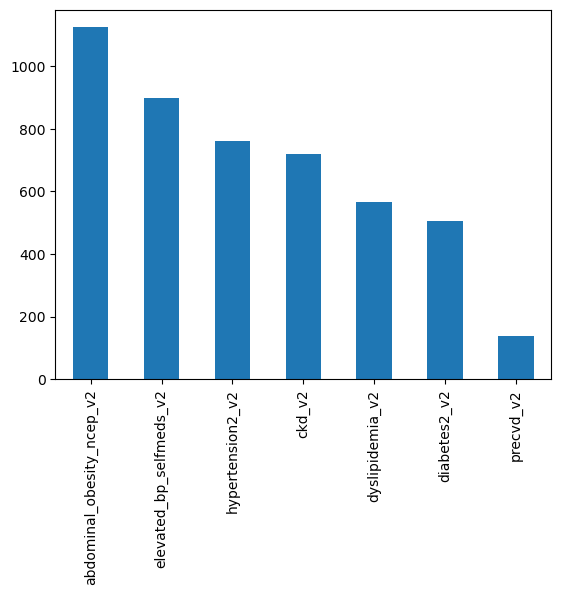

In [28]:
final_metadata[disease_cols].sum().sort_values(ascending=False).plot(kind='bar')

### Num people who have multiple diseases

/tmp/ipykernel_764/933409314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_metadata['total_diseases'] = final_metadata[disease_cols].sum(axis=1)


2.0    331
4.0    314
3.0    294
1.0    287
5.0    212
0.0    114
6.0     80
7.0     12
Name: total_diseases, dtype: int64

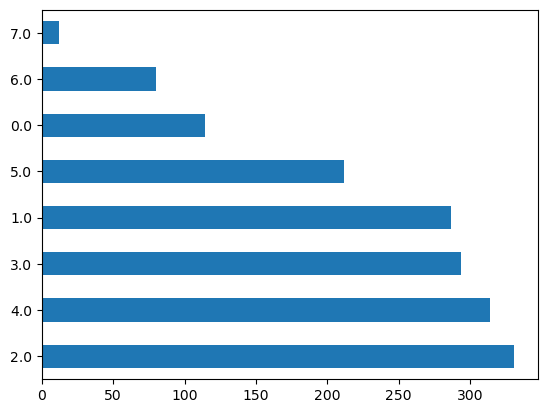

In [29]:
final_metadata['total_diseases'] = final_metadata[disease_cols].sum(axis=1)
final_metadata['total_diseases'].value_counts().plot(kind = 'barh')
final_metadata['total_diseases'].value_counts()

### Co-occurence between disease types

<AxesSubplot: >

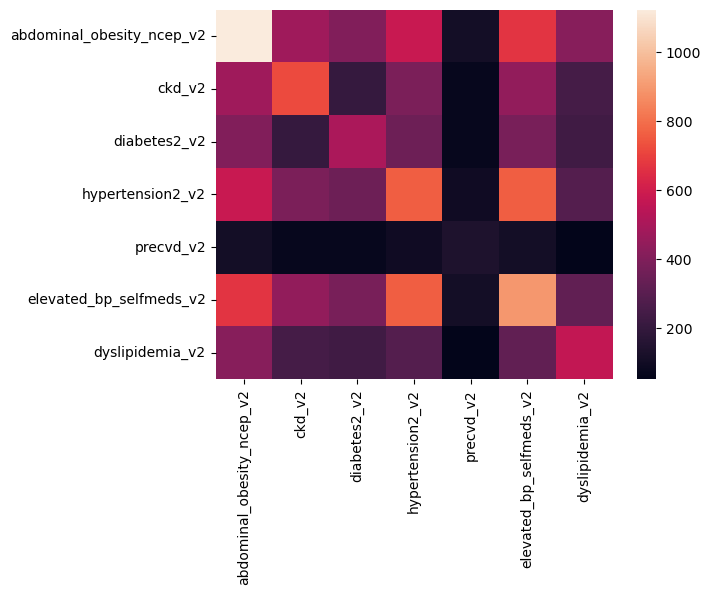

In [30]:
sns.heatmap(final_metadata[disease_cols].T.dot(final_metadata[disease_cols]))

### Filtering feature table samples...Can probably skip this and instead filter features

In [31]:
updated_feature_table = filter_samples(table, metadata = qiime_metadata).filtered_table
updated_feature_table

<artifact: FeatureTable[Frequency] uuid: 9c12c232-9452-4001-ab57-c2efe42563f0>

In [32]:
biom_table = updated_feature_table.view(biom.Table)
print(biom_table.head())

# Constructed from biom file
#OTU ID	11666.G0341A	11666.G0393A	11666.G0149A	11666.G0091A	11666.G0377A
AACATAAGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGCCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGTCCGGAAACACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCATAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0
AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGAGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG	0.0	0.0	0.0	0.0	0.0


# Model Creation

In [33]:
## Need to switch to T and F for qiime models, need to move this to earlier step
final_metadata['ckd_v2'] = final_metadata['ckd_v2'].apply(lambda x: binary_to_tf(x))
final_metadata.to_csv("data/temp/final_metadata.tsv",sep="\t")
## Loading Metadata as qiime Metadata object
qiime_metadata = Metadata.load("data/temp/final_metadata.tsv")

/tmp/ipykernel_764/34222830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_metadata['ckd_v2'] = final_metadata['ckd_v2'].apply(lambda x: binary_to_tf(x))


In [34]:
qiime_metadata

Metadata
--------
1644 IDs x 14 columns
abdominal_obesity_ncep_v2: ColumnProperties(type='numeric', missing_scheme='blank')
ckd_v2:                    ColumnProperties(type='categorical', missing_scheme='blank')
diabetes2_v2:              ColumnProperties(type='numeric', missing_scheme='blank')
hypertension2_v2:          ColumnProperties(type='numeric', missing_scheme='blank')
precvd_v2:                 ColumnProperties(type='numeric', missing_scheme='blank')
elevated_bp_selfmeds_v2:   ColumnProperties(type='numeric', missing_scheme='blank')
dyslipidemia_v2:           ColumnProperties(type='numeric', missing_scheme='blank')
gender_v2:                 ColumnProperties(type='categorical', missing_scheme='blank')
agegroup_c6_v2:            ColumnProperties(type='numeric', missing_scheme='blank')
bmigrp_c6_v2:              ColumnProperties(type='numeric', missing_scheme='blank')
center:                    ColumnProperties(type='categorical', missing_scheme='blank')
us_born_v2:             

### Qiime model

/opt/conda/envs/qiime2-2022.11/lib/python3.8/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


Results (name = value)
-------------------------------------------------------------------------------------------------------------
sample_estimator   = <artifact: SampleEstimator[Classifier] uuid: b6138940-eba3-492b-8abc-64c0da877482>
feature_importance = <artifact: FeatureData[Importance] uuid: 83d3f50b-e95c-4cf5-9b62-912d02df54cd>
predictions        = <artifact: SampleData[ClassifierPredictions] uuid: 56f88286-61a1-49a1-ace8-3da37c926c22>
model_summary      = <visualization: Visualization uuid: 5d9753cf-53b6-498b-bf64-7456cef1f095>
accuracy_results   = <visualization: Visualization uuid: 215b1cb3-85f8-4a1e-b4d0-6b3b5156d3df>
probabilities      = <artifact: SampleData[Probabilities] uuid: 76e721cc-50be-4b51-8fba-09e55915ee49>
heatmap            = <visualization: Visualization uuid: 2b9f00a9-bcc1-4f94-a6c8-9397f457e365>
training_targets   = <artifact: SampleData[TrueTargets] uuid: c897bf73-70fe-4e7a-87dd-37e925b51c3e>
test_targets       = <artifact: SampleData[TrueTargets] uuid: c06e

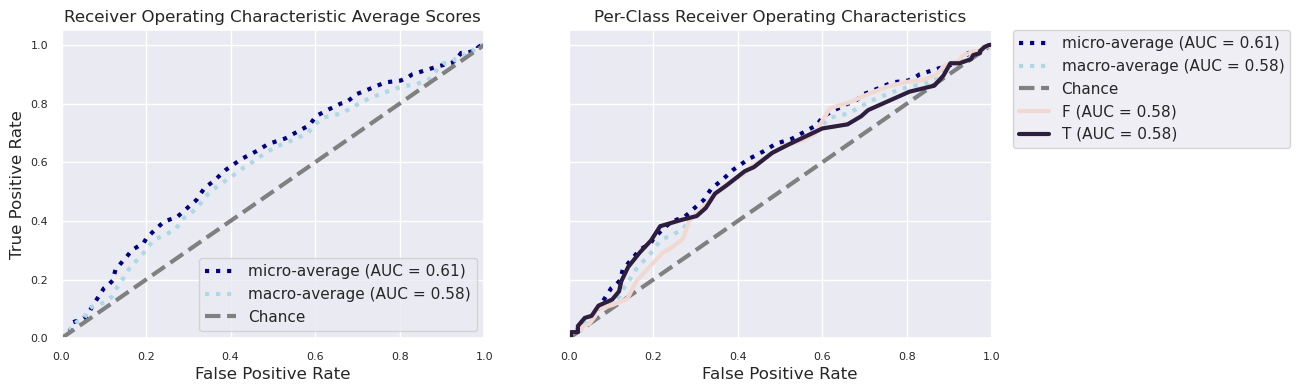

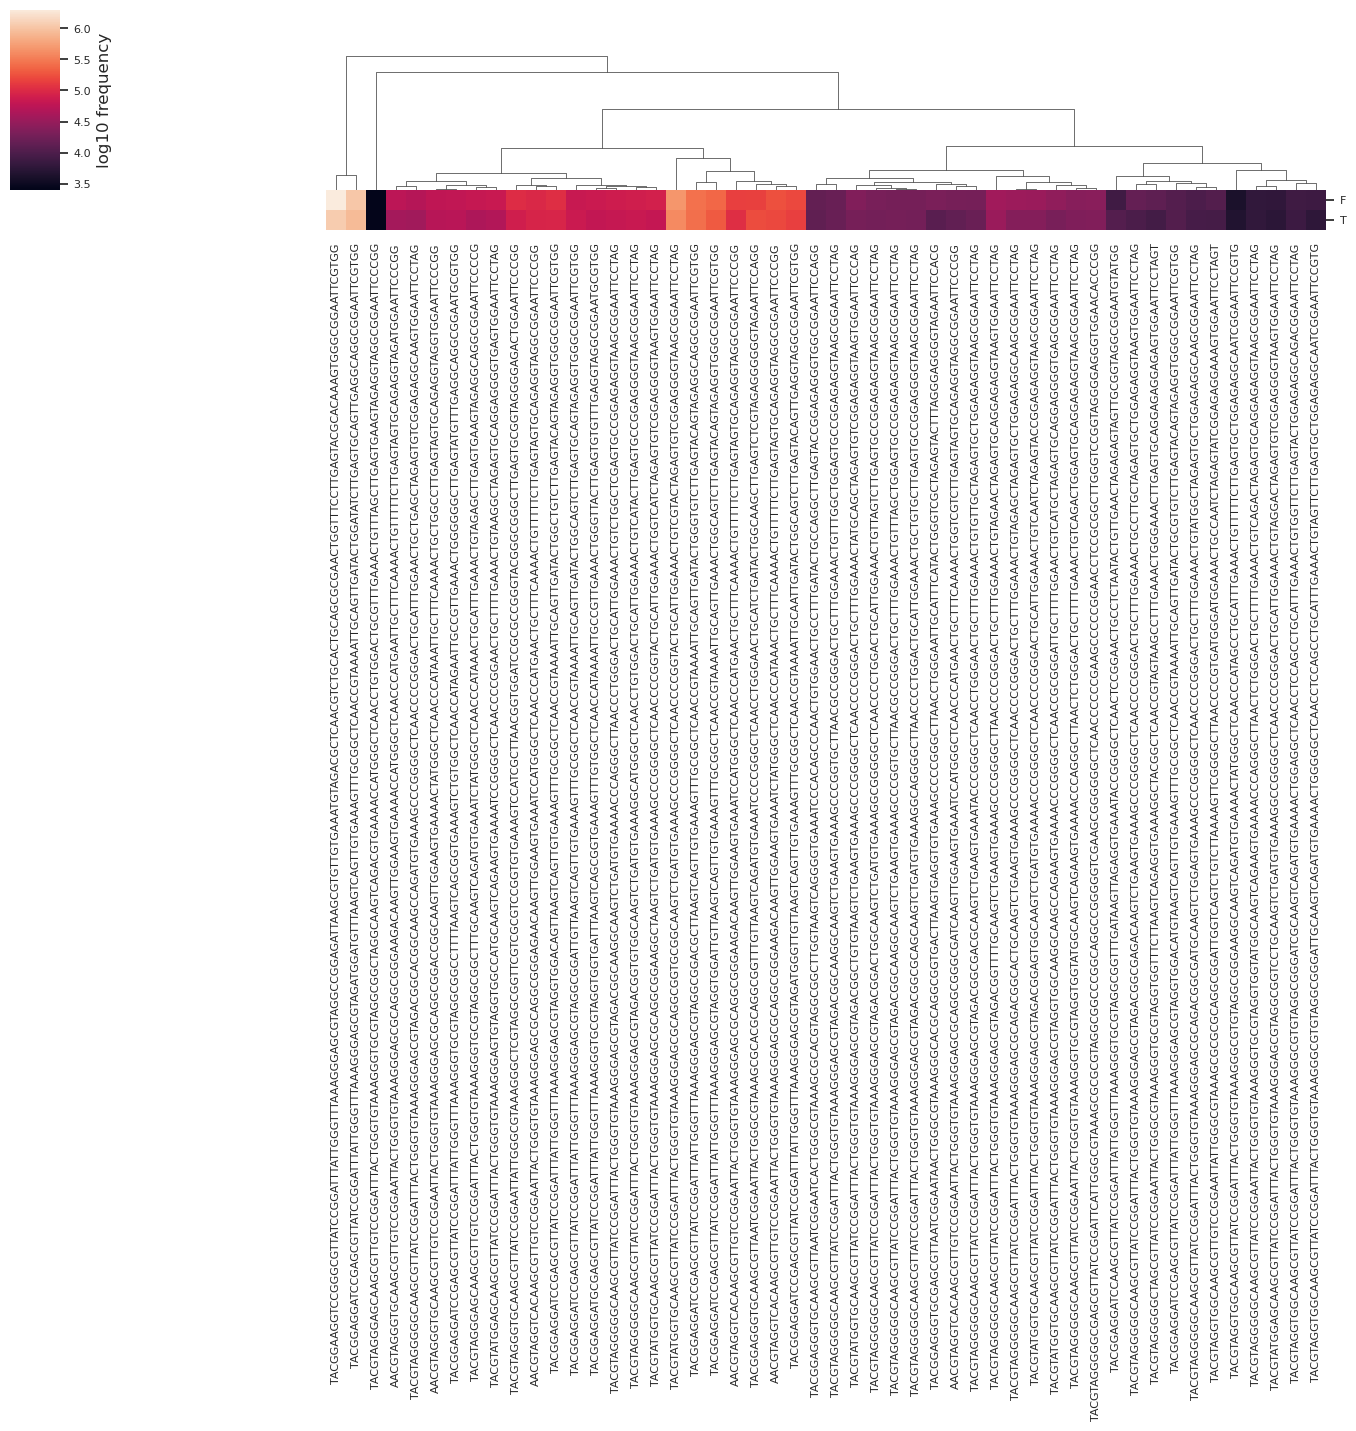

In [35]:
classify_samples(updated_feature_table, qiime_metadata.get_column('ckd_v2'), missing_samples='ignore')